<a href="https://colab.research.google.com/github/charana13/Stock_Predictions/blob/main/Stock_predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import table
import datetime as dt

In [2]:
#Importing DataSet

Data = pd.read_csv("/content/TSLA.csv")

In [3]:
#Viewing the Data Set
Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [4]:
#Checking the datatype of variables
Data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
#Converting the Date column to DateTime Object
Data['Date'] = pd.to_datetime(Data['Date'])

In [6]:
# Disabling the scientific notation to get grasp of figures better
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#Getting initial descriptive statistics
Data.describe(include='all')

<ipython-input-6-8a250aaa4117>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Data.describe(include='all')


,Date,Open,High,Low,Close,Adj Close,Volume
count,2416,2416.00,2416.00,2416.00,2416.00,2416.00,2416.00
unique,2416,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2010-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-02-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,186.27,189.58,182.92,186.40,186.40,5572721.69
std,NaN,118.74,120.89,116.86,119.14,119.14,4987809.15
min,NaN,16.14,16.63,14.98,15.80,15.80,118500.00
25%,NaN,34.34,34.90,33.59,34.40,34.40,1899275.00


In [7]:
#Checking for null values, performing imputations if found
Data.isnull().values.sum() # In this case, it is 0. So, we can proceed

0

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>]], dtype=object)

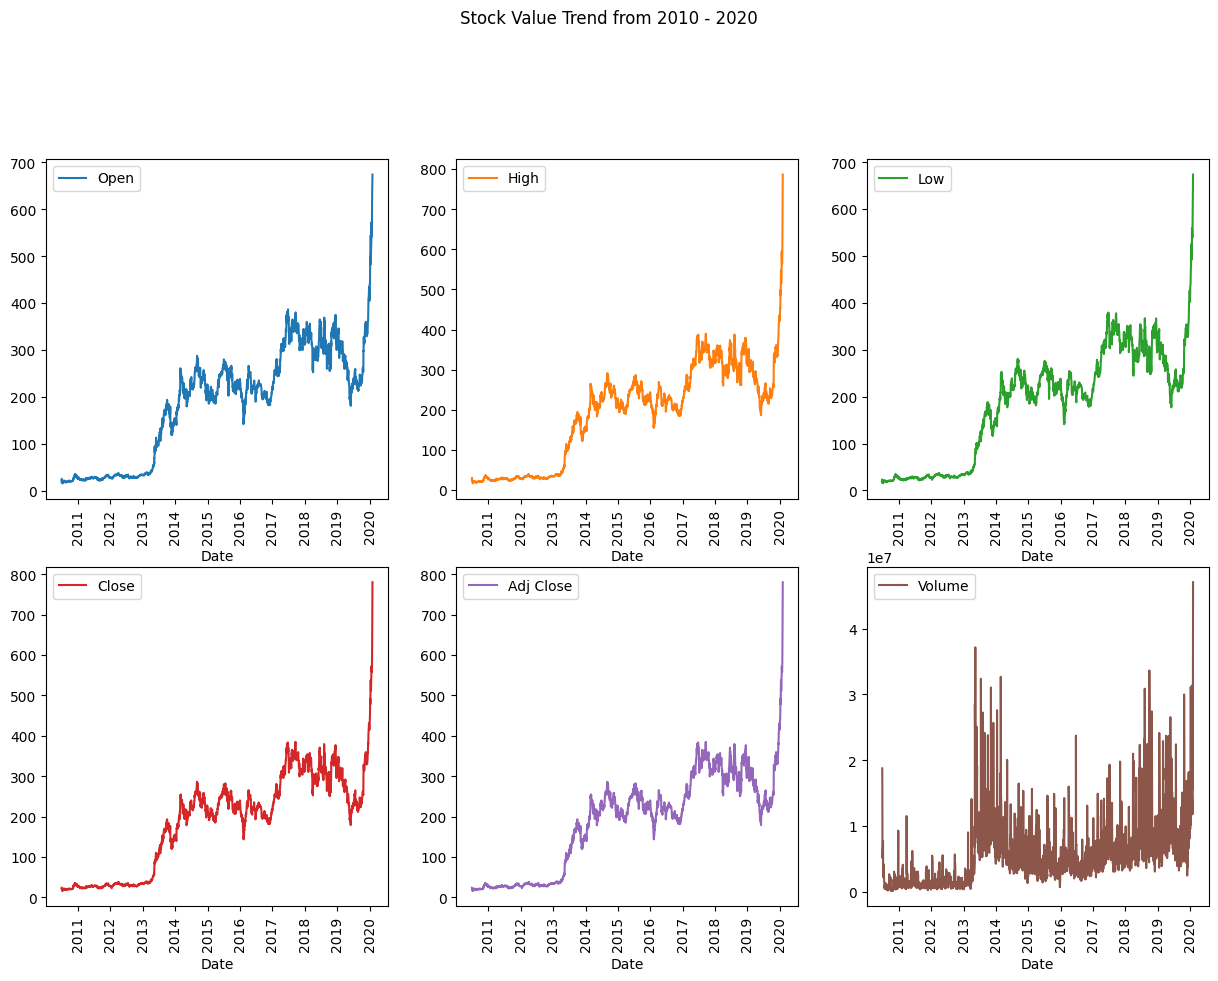

In [8]:
#Variation of Stock Trade over time
#A glimpse of how the market share varied over the given time

#Creating a list for numerical columns that are needed to visualized
Column_List= ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

#Plotting to view
Data.plot(x= "Date", y = Column_List, subplots = True, layout = (3, 3), figsize = (15, 15),
         sharex =  False, title = "Stock Value Trend from 2010 - 2020", rot=90)

<ipython-input-9-1bad0ffcaaed>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[col_list], hist = True, ax = ax[i])
<ipython-input-9-1bad0ffcaaed>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[col_list], hist = True, ax = ax[i])
<ipython-input-9-1bad0ffcaaed>:7: UserWarning: 

`dist

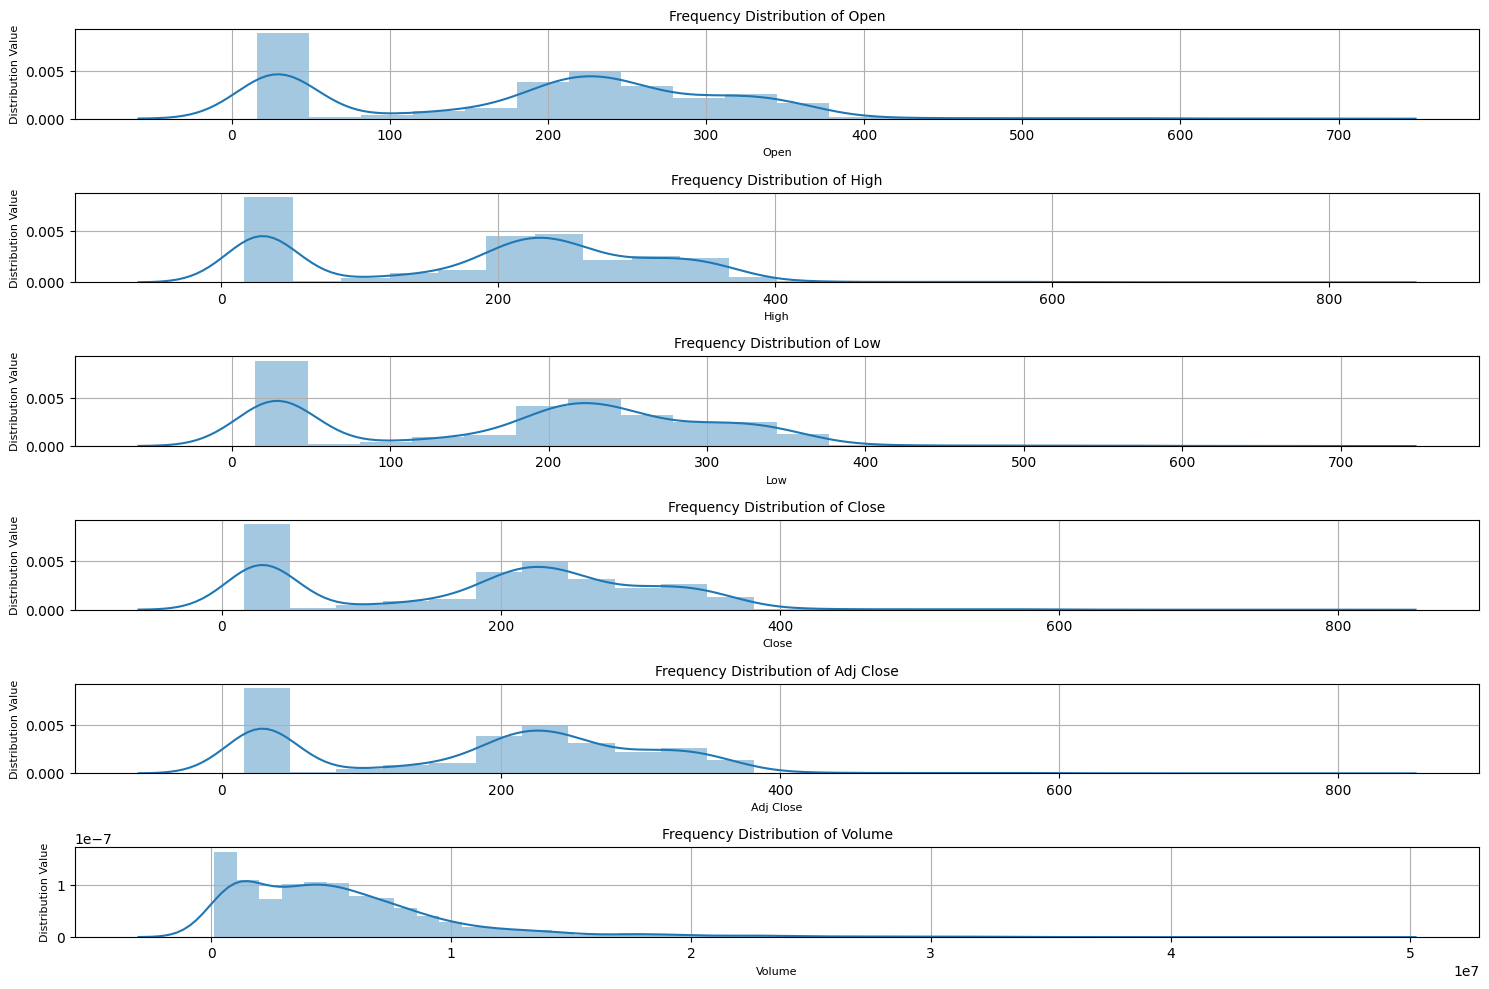

In [9]:
# Visualizing the spread and skweness through the distribution plot

# Use the Column_List : list initialized above in the following steps

fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))
for i, col_list in enumerate(Column_List):
    sns.distplot(Data[col_list], hist = True, ax = ax[i])
    ax[i].set_title("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel(col_list, fontsize = 8)
    ax[i].set_ylabel('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on') # Enabled to view and make markings

<ipython-input-10-786f01f15b21>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Data.corr()


<Axes: >

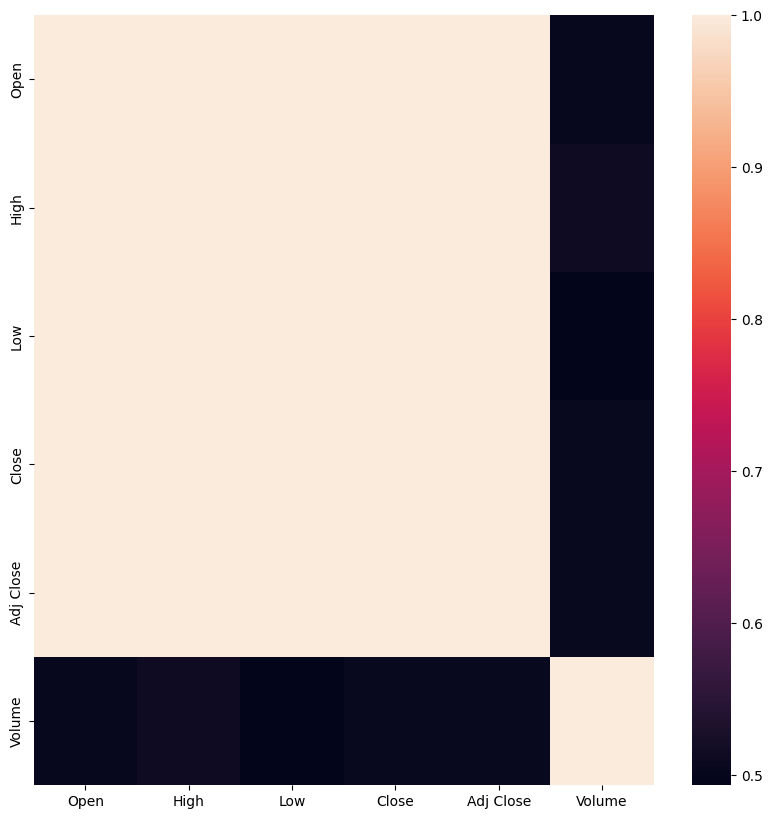

In [10]:
#Checking for factors responsible in overall volume trade

#Performing default correlation using Pearson Method

fig, ax = plt.subplots (figsize = (10, 10))
corr_matrix = Data.corr()

# Plotting the correlation matrix in a heatmap to build better understanding

sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels = corr_matrix.columns.values)

In [11]:
# viewing the matrix in a table to identify the numerical values of strengths
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,1.00,1.00,1.00,0.50
High,1.00,1.00,1.00,1.00,1.00,0.51
Low,1.00,1.00,1.00,1.00,1.00,0.49
Close,1.00,1.00,1.00,1.00,1.00,0.51
Adj Close,1.00,1.00,1.00,1.00,1.00,0.51
Volume,0.50,0.51,0.49,0.51,0.51,1.00


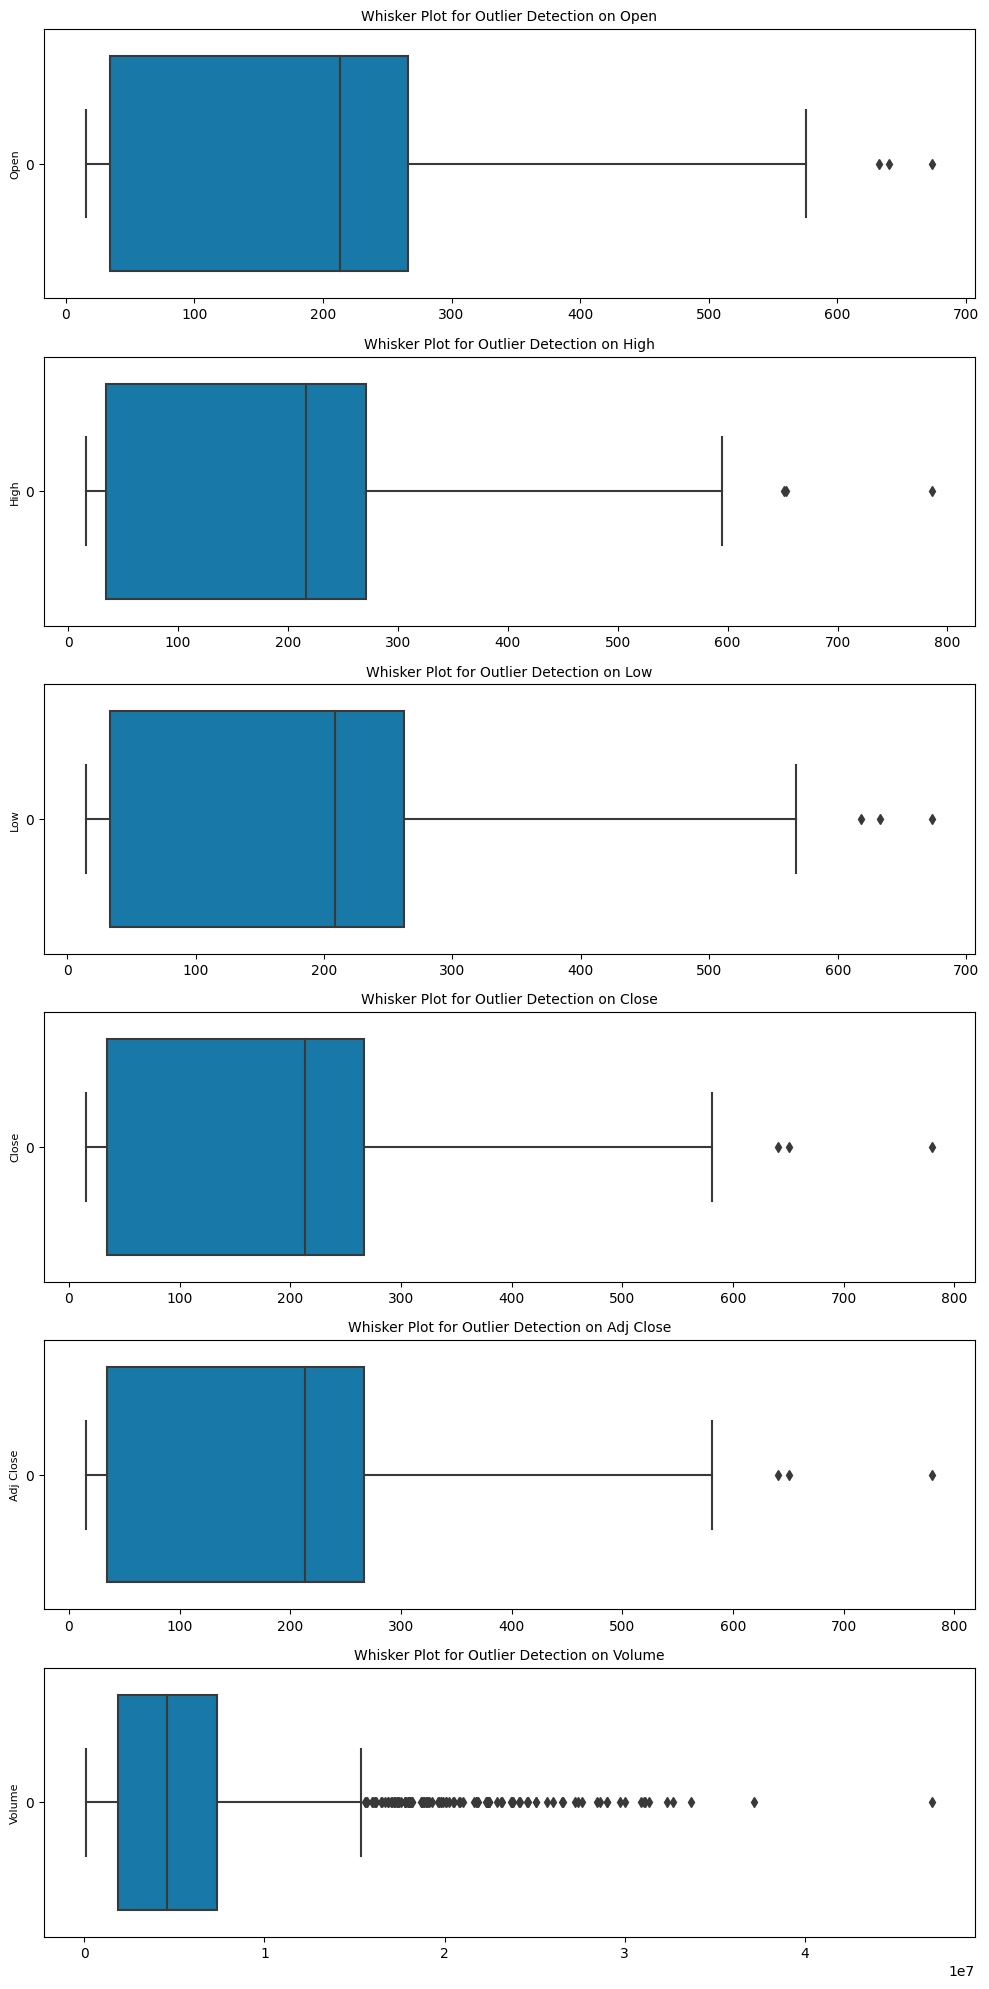

In [12]:
#Detecting outliers and removing them

# Generate whisker plots to detect the presence of any outliers

fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(Data[col_list], ax = ax[i], palette = "winter", orient = "h")
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

In [14]:

#Outliers are removed using Z-Score due to the variability in historical data
Data = Data[(np.abs(stats.zscore(Data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])) < 3).all(axis=1)] #abs for (+/-) 3-sigma
Data = Data.reset_index()
#Due to elimination of rows indexes are being reset

In [15]:
Data

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900
...,...,...,...,...,...,...,...,...
2354,2396,2020-01-06,440.47,451.56,440.00,451.54,451.54,10133000
2355,2397,2020-01-07,461.40,471.63,453.36,469.06,469.06,17882100
2356,2400,2020-01-10,481.79,484.94,473.70,478.15,478.15,12959500
2357,2403,2020-01-15,529.76,537.84,516.79,518.50,518.50,17368800


In [16]:
# Analysis on Historical Data to find patterns
#Since the data is a time series data, this data should be capable to predict the future through forecasting techniques
# Deleting the index column due to reset
#del Data['index']
#Decomposing the timeseries year-wise, month-wise to analyse further
Data['Year'] = Data['Date'].dt.year
Data['Month'] = Data['Date'].dt.month
Data['WeekDay'] = Data['Date'].dt.weekday

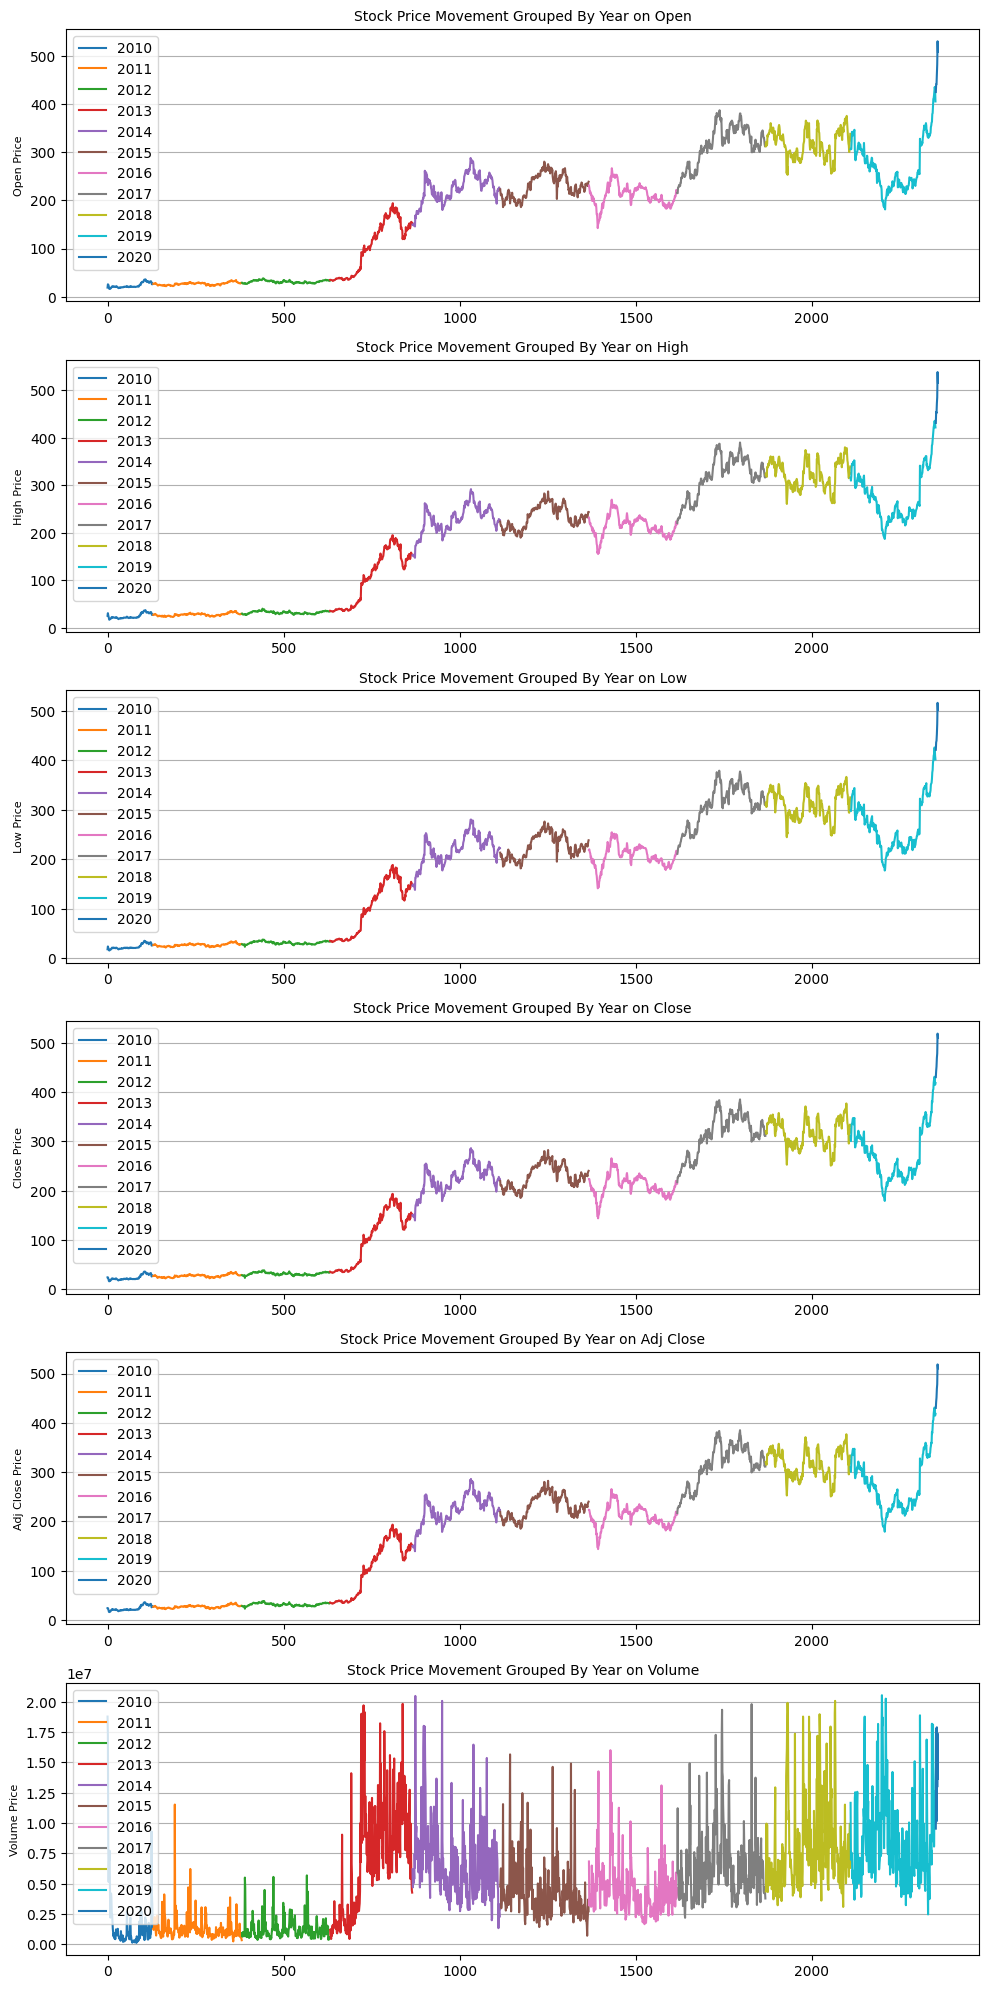

In [17]:
# Plotting the data year-wise to see the duration of when it hiked and dipped

fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))

# Grouping the data by year and plotting

for i, col_list in enumerate(Column_List):
    Data.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped By Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True) # To enable grid only on the Y-axis

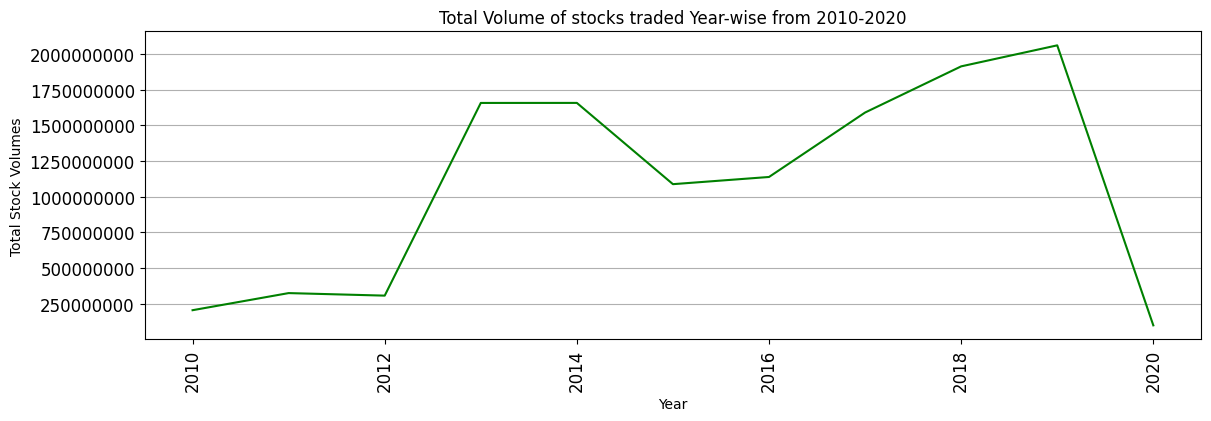

In [18]:
# Visualizing the total volume of stocks traded grouped year-wise
check = Data.groupby('Year')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False,
          title = "Total Volume of stocks traded Year-wise from 2010-2020", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = "plain")
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

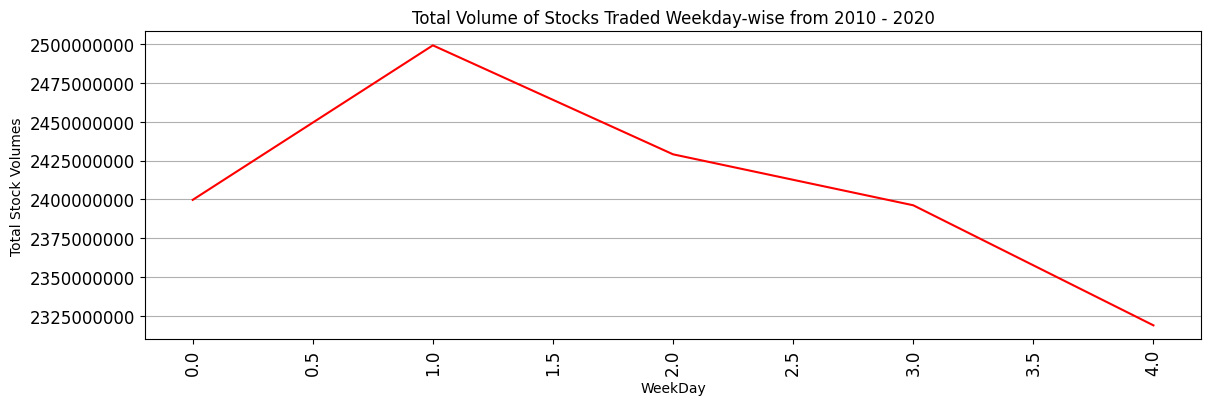

In [19]:
# Visualizing only the total volume of stocks traded grouped weekday-wise
check = Data.groupby("WeekDay")['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Weekday-wise from 2010 - 2020", rot = 90, color = "red")
ax1.ticklabel_format(useOffset = False, style = "plain")
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)


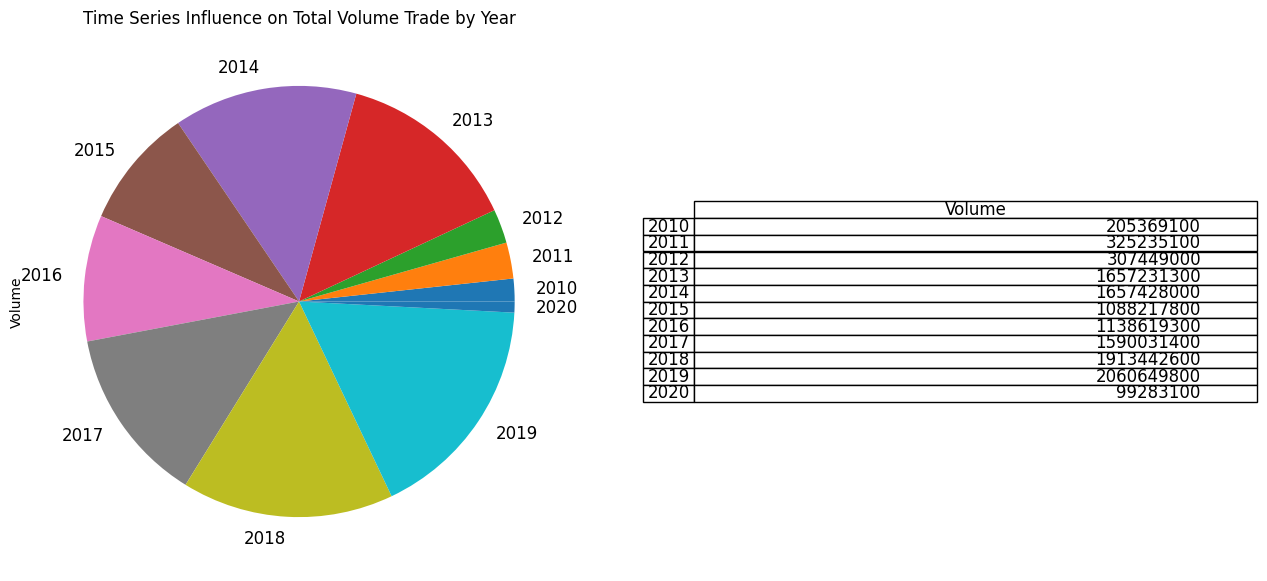

In [20]:
# Pie charts to show the extensive influence of time in the overall volume trade

# Analyse based on Year
for i, col_list in enumerate(Column_List):
    var = Data.groupby('Year')[col_list].sum()

# Convert the variable into pandas dataframe

var = pd.DataFrame(var)

# Plot to understand the trend

plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False,
        title = "Time Series Influence on Total Volume Trade by Year", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off')
#as we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

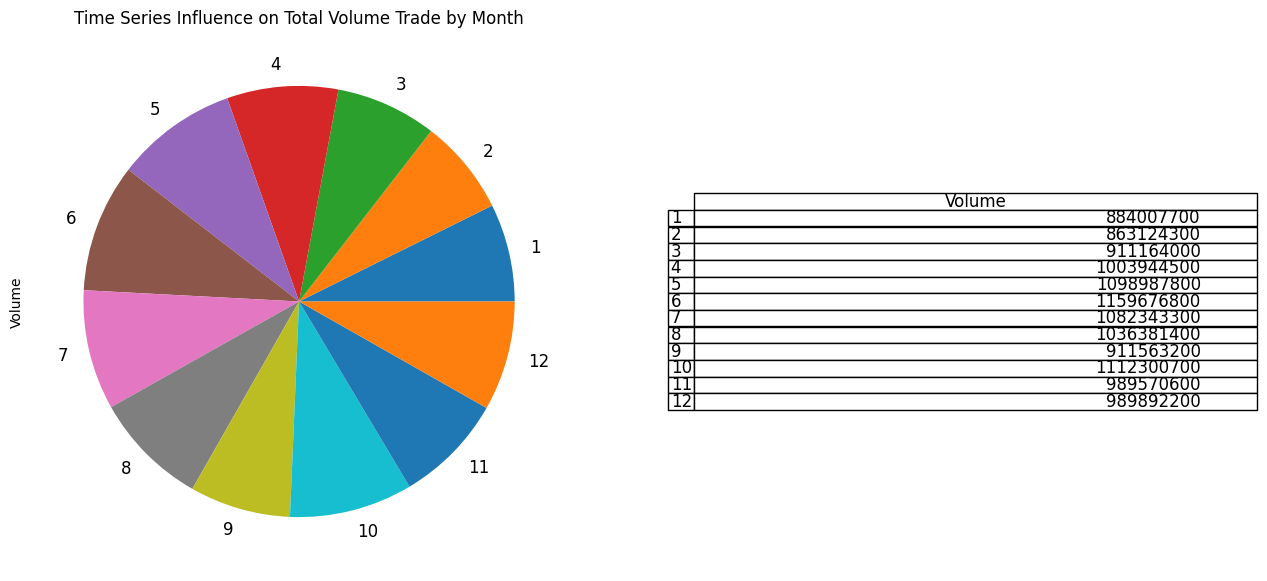

In [21]:
# Analysing based on year
for i, col_list in enumerate(Column_List):
    var = Data.groupby('Month')[col_list].sum()

# Convert the variable into a pandas dataframe

var = pd.DataFrame(var)

#Plotting to understanding the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False,
         title = "Time Series Influence on Total Volume Trade by Month", ax = ax1)

# Plot the table to identify numbers

ax2 = plt.subplot(122)
plt.axis("off")
# As we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()


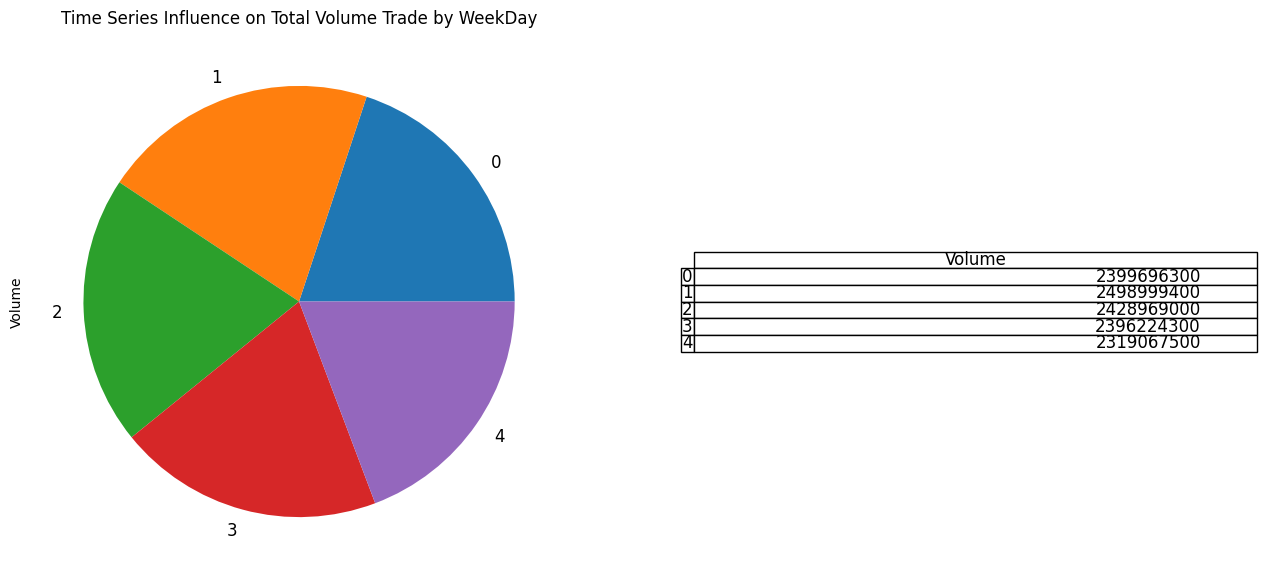

In [22]:
# Analyse based on Year
for i, col_list in enumerate(Column_List):
    var = Data.groupby('WeekDay')[col_list].sum()

# Convert the variable into pandas dataframe

var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False,
        title = "Time Series Influence on Total Volume Trade by WeekDay", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # As we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()
